## Python / Réseau de neurones

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

### Chargement des données

In [4]:
## Loading datas
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Affichage des informations des données

In [6]:
print('Shape of train images')
print(train_images.shape[0])
print(train_images.shape)
print('Shape of train labels')
print(train_labels.shape)

Shape of train images
60000
(60000, 28, 28)
Shape of train labels
(60000,)


### Sélection des données

In [7]:
## On ne prend qu'une partie des données
NN = input("Combien d'images pour l'entrainement ?")
while int(NN) > train_images.shape[0]:
    print("Valeur non possible")
    NN = input("Combien d'images pour l'entrainement ?")
train_images = train_images[:int(NN)]
train_labels = train_labels[:int(NN)]

print('After RESHAPE !!')
print('Shape of train images')
print(train_images.shape)
print('Shape of train labels')
print(train_labels.shape)

Combien d'images pour l'entrainement ?10000
After RESHAPE !!
Shape of train images
(10000, 28, 28)
Shape of train labels
(10000,)


### Normalisation des données

In [8]:
## On normalise les données
max_img = train_images.max()
train_images = train_images / max_img
test_images = test_images / max_img

## Définition du modèle

In [9]:
## Modele
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # images size - 28x28 -> 784x1
    keras.layers.Dense(512, activation=tf.nn.relu),      # couche intermédiaire
    keras.layers.Dense(256, activation=tf.nn.relu),      # couche intermédiaire
    keras.layers.Dense(128, activation=tf.nn.relu),      # couche intermédiaire
    keras.layers.Dense(64, activation=tf.nn.relu),      # couche intermédiaire
    keras.layers.Dense(10, activation=tf.nn.softmax)    # taille de sortie
])

2022-04-20 18:21:13.301240: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
## Compilation du modele
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
__________________________________________________

## Entrainement du réseau

Entrainement sur le set de données (train_images) sur 10 epochs - Cette étape peut prendre du temps en fonction de la complexité du modèle et du nombre d'epochs.

In [11]:
## Training
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
# avec verication sur données test

2022-04-20 18:22:28.734903: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-20 18:22:28.736991: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1996250000 Hz


Epoch 1/10
313/313 [==============================] - 5s 16ms/step - loss: 0.9553 - accuracy: 0.6642 - val_loss: 0.5803 - val_accuracy: 0.7848
Epoch 2/10
313/313 [==============================] - 4s 14ms/step - loss: 0.5061 - accuracy: 0.8141 - val_loss: 0.4818 - val_accuracy: 0.8216
Epoch 3/10
313/313 [==============================] - 4s 14ms/step - loss: 0.4262 - accuracy: 0.8406 - val_loss: 0.4527 - val_accuracy: 0.8354
Epoch 4/10
313/313 [==============================] - 4s 14ms/step - loss: 0.3825 - accuracy: 0.8598 - val_loss: 0.4732 - val_accuracy: 0.8317
Epoch 5/10
313/313 [==============================] - 4s 14ms/step - loss: 0.3434 - accuracy: 0.8736 - val_loss: 0.4415 - val_accuracy: 0.8444
Epoch 6/10
313/313 [==============================] - 4s 14ms/step - loss: 0.3297 - accuracy: 0.8732 - val_loss: 0.4685 - val_accuracy: 0.8308
Epoch 7/10
313/313 [==============================] - 4s 14ms/step - loss: 0.2970 - accuracy: 0.8917 - val_loss: 0.4475 - val_accuracy: 0.8455

### Résultats

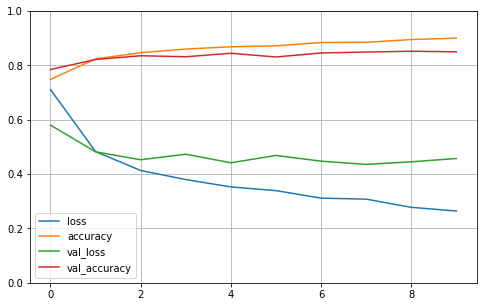

313/313 [==============================] - 1s 3ms/step - loss: 0.4573 - accuracy: 0.8498


array([9, 2, 1, ..., 8, 1, 5])

In [12]:
## Affichage des couts au cours des epochs
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)

### Prédictions sur un autre set de données

In [16]:
y_proba = model.predict(test_images)
y_pred = y_proba.argmax(axis=1)   # pour obtenir l'indice de la case max
print("Valeurs vraies : "+str(test_labels))
print("Predictions    : "+str(y_pred))

Valeurs vraies : [9 2 1 ... 8 1 5]
Predictions    : [9 2 1 ... 8 1 5]
